# **LA LIGA PLAYER COMPARISON**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import os
from PIL import Image
from scipy import stats
Jornada = 26

In [ ]:
!pip install soccerplots
from soccerplots.radar_chart import Radar
from soccerplots.utils import add_image

## Forward comparisons

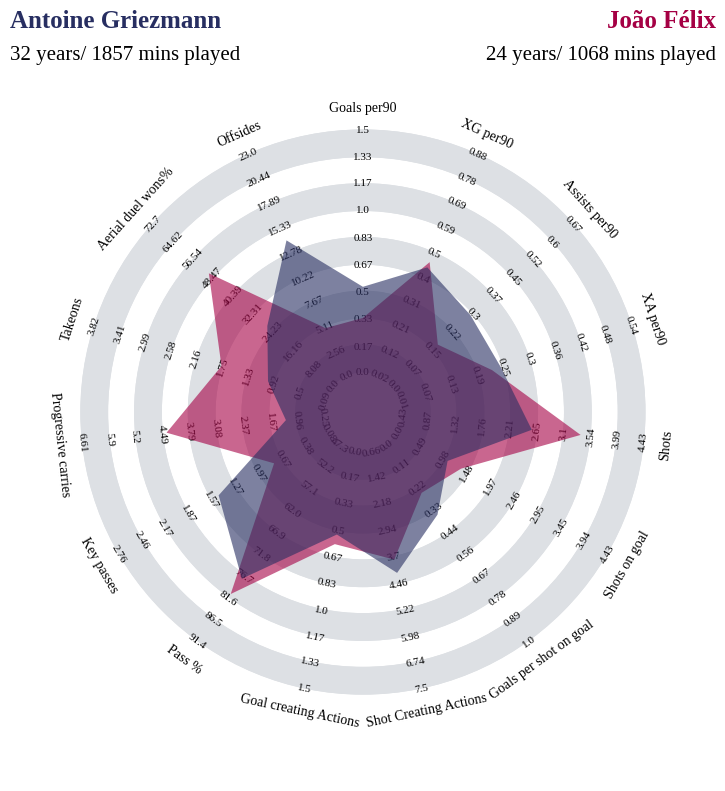

In [ ]:


# Load your datasets, replace 'std_df', 'pass_types_df', 'miscellaneous_df' with your actual dataframes.
std_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
shoot_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_shooting_Stats_Jornada{Jornada}.csv')
gca_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_gca_Stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_misc_Stats_Jornada{Jornada}.csv')


# FILTRAR POR DELANTEROS
std_df = std_df[(std_df['position'].notna() & std_df['position'].str.contains('FW')) & (std_df['minutes_90s']>4)]
shoot_df = shoot_df[(shoot_df['position'].notna() & shoot_df['position'].str.contains('FW')) & (shoot_df['minutes_90s']>4)]
gca_df = gca_df[(gca_df['position'].notna() & gca_df['position'].str.contains('FW')) & (shoot_df['minutes_90s']>4)]
passing_df = passing_df[(passing_df['position'].notna() & passing_df['position'].str.contains('FW')) & (passing_df['minutes_90s']>4)]
possession_df = possession_df[(possession_df['position'].notna() & possession_df['position'].str.contains('FW')) & (possession_df['minutes_90s']>4)]
miscellaneous_df = miscellaneous_df[miscellaneous_df['position'].notna() & miscellaneous_df['position'].str.contains('FW')&(miscellaneous_df['minutes_90s']>4)]

# Modify possession dataframe to add a column named takons per game (equal to take_ons_won/matches)
possession_df = possession_df.merge(std_df[['player', 'games']], on='player', how='left')
possession_df['take_ons_won_per90'] = possession_df['take_ons_won'] / possession_df['minutes_90s']
possession_df['progressive_carries_per90'] = possession_df['progressive_carries'] / possession_df['minutes_90s']

passing_df = passing_df.merge(std_df[['player', 'games']], on='player', how='left')
passing_df['key_passes_per90'] = passing_df['assisted_shots'] / passing_df['games']

# Filter data for a specific team (replace 'your_team' with your desired team name)
player = 'Antoine Griezmann'
color0 = '#272E61'
std_data0 = std_df[std_df['player'] == player]
shoot_data0 = shoot_df[shoot_df['player'] == player]
gca_data0 = gca_df[gca_df['player'] == player]
pass_data0 = passing_df[passing_df['player'] == player]
possession_data0 = possession_df[possession_df['player'] == player]
miscellaneous_data0 = miscellaneous_df[miscellaneous_df['player'] == player]

age = std_data0["age"].values[0]
minutes_played0 = std_data0["minutes"].values[0]

# Filter data for a specific team (replace 'your_team' with your desired team name)
player1 = 'João Félix'
color1 = '#A50044'
std_data1 = std_df[std_df['player'] == player1]
shoot_data1 = shoot_df[shoot_df['player'] == player1]
gca_data1 = gca_df[gca_df['player'] == player1]
pass_data1 = passing_df[passing_df['player'] == player1]
possession_data1 = possession_df[possession_df['player'] == player1]
miscellaneous_data1 = miscellaneous_df[miscellaneous_df['player'] == player1]

age1 = std_data1["age"].values[0]
minutes_played1 = std_data1["minutes"].values[0]


# Define the radar pie chart categories and values
categories = ['Goals per90','XG per90','Assists per90','XA per90','Shots',
              'Shots on goal','Goals per shot on goal','Shot Creating Actions','Goal creating Actions',
              'Pass %','Key passes','Progressive carries','Takeons','Aerial duel wons%',
              'Offsides']


values = [
    std_data0['goals_per90'].mean(),
    std_data0['xg_per90'].mean(),
    std_data0['assists_per90'].mean(),
    std_data0['xg_assist_per90'].mean(),
    shoot_data0['shots_per90'].mean(),
    shoot_data0['shots_on_target_per90'].mean(),
    shoot_data0['goals_per_shot_on_target'].mean(),
    gca_data0['sca_per90'].mean(),
    gca_data0['gca_per90'].mean(),
    pass_data0['passes_pct'].mean(),
    pass_data0['key_passes_per90'].mean(),
    possession_data0['progressive_carries_per90'].mean(),
    possession_data0['take_ons_won_per90'].mean(),
    miscellaneous_data0['aerials_won_pct'].mean(),
    miscellaneous_data0['offsides'].mean(),
]

values1 = [
    std_data1['goals_per90'].mean(),
    std_data1['xg_per90'].mean(),
    std_data1['assists_per90'].mean(),
    std_data1['xg_assist_per90'].mean(),
    shoot_data1['shots_per90'].mean(),
    shoot_data1['shots_on_target_per90'].mean(),
    shoot_data1['goals_per_shot_on_target'].mean(),
    gca_data1['sca_per90'].mean(),
    gca_data1['gca_per90'].mean(),
    pass_data1['passes_pct'].mean(),
    pass_data1['key_passes_per90'].mean(),
    possession_data1['progressive_carries_per90'].mean(),
    possession_data1['take_ons_won_per90'].mean(),
    miscellaneous_data1['aerials_won_pct'].mean(),
    miscellaneous_data1['offsides'].mean(),
]

# Define ranges for scaling the values
value_ranges = [
    (std_df['goals_per90'].min(), 1.5),    # Goals per90
    (std_df['xg_per90'].min(), std_df['xg_per90'].max()),    # xG per90
    (std_df['assists_per90'].min(), std_df['assists_per90'].max()),    # Assists per90
    (std_df['xg_assist_per90'].min(),std_df['xg_assist_per90'].max()),    # xAssist per90
    (shoot_df['shots_per90'].min(), shoot_df['shots_per90'].max()),  # Shots per 90
    (shoot_df['shots_on_target_per90'].min(), shoot_df['shots_per90'].max()),  # Shots on target per 90
    (shoot_df['goals_per_shot_on_target'].min(), shoot_df['goals_per_shot_on_target'].max()), # Goals per shot on target
    (gca_df['sca_per90'].min(),7.5), # SCA per 90
    (gca_df['gca_per90'].min(), 1.5), # GCA per 90
    (passing_df['passes_pct'].min(),passing_df['passes_pct'].max()), # Passing pct
    (passing_df['key_passes_per90'].min(),passing_df['key_passes_per90'].max()), # Key Passes per 90
    (possession_df['progressive_carries_per90'].min(), possession_df['progressive_carries_per90'].max()), # Progressive carries per 90
    (possession_df['take_ons_won_per90'].min(),  possession_df['take_ons_won_per90'].max()), # Take ons percentage
    (miscellaneous_df['aerials_won_pct'].min(), miscellaneous_df['aerials_won_pct'].max()), # Aerial percentage
    (miscellaneous_df['offsides'].min(), miscellaneous_df['offsides'].max()) # Offsides
]

values= [values1,values]
radar = Radar(patch_color="#DDE0E4",label_fontsize=10,range_fontsize=8) # Initialize the object

title = dict(
    title_name=f'{player}',
    title_color = color0,
    subtitle_name = f'{age} years/ {minutes_played0} mins played',
    subtitle_color = 'black',
    title_name_2=f'{player1}',
    title_color_2 = color1,
    subtitle_name_2 = f'{age1} years/ {minutes_played1} mins played',
    subtitle_color_2 = 'black',
    title_fontsize = 18,
    subtitle_fontsize=15
)


fig,ax = radar.plot_radar(ranges=value_ranges, params=categories,values=values,
                          radar_color = [color1, color0], alphas=[.6,.6],
                          title=title, endnote=None,end_color="white", dpi=600,filename="a",
                          compare=True)



# Forward vs mean

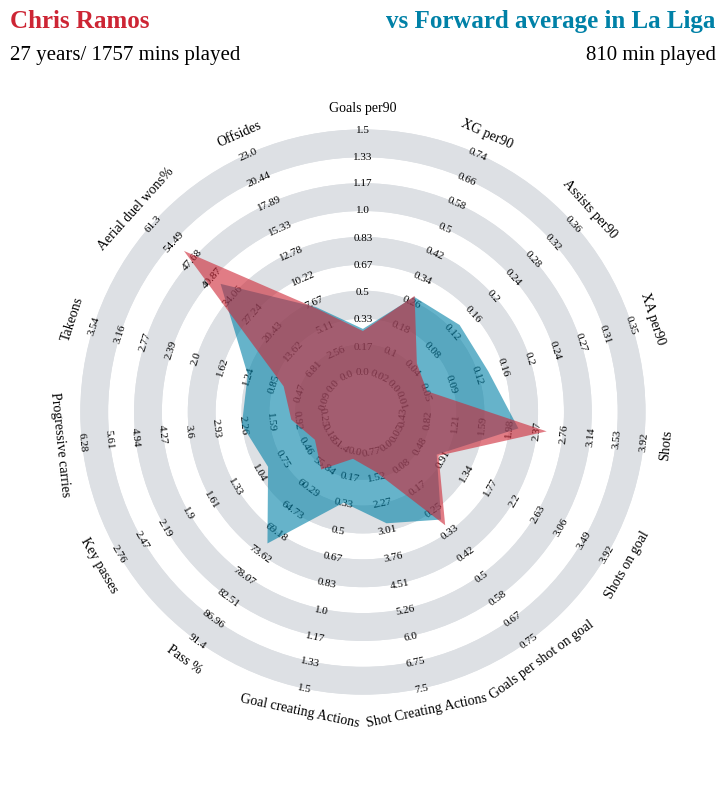

In [ ]:


# Load your datasets, replace 'std_df', 'pass_types_df', 'miscellaneous_df' with your actual dataframes.
std_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
shoot_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_shooting_Stats_Jornada{Jornada}.csv')
gca_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_gca_Stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_misc_Stats_Jornada{Jornada}.csv')

match_th=9
# FILTRAR POR DELANTEROS
std_df = std_df[(std_df['position'].notna() & std_df['position'].str.contains('FW')) & (std_df['minutes_90s']>match_th)]
shoot_df = shoot_df[(shoot_df['position'].notna() & shoot_df['position'].str.contains('FW')) & (shoot_df['minutes_90s']>match_th)]
gca_df = gca_df[(gca_df['position'].notna() & gca_df['position'].str.contains('FW')) & (shoot_df['minutes_90s']>match_th)]
passing_df = passing_df[(passing_df['position'].notna() & passing_df['position'].str.contains('FW')) & (passing_df['minutes_90s']>match_th)]
possession_df = possession_df[(possession_df['position'].notna() & possession_df['position'].str.contains('FW')) & (possession_df['minutes_90s']>match_th)]
miscellaneous_df = miscellaneous_df[miscellaneous_df['position'].notna() & miscellaneous_df['position'].str.contains('FW')&(miscellaneous_df['minutes_90s']>match_th)]

# Modify possession dataframe to add a column named takons per game (equal to take_ons_won/matches)
possession_df = possession_df.merge(std_df[['player', 'games']], on='player', how='left')
possession_df['take_ons_won_per90'] = possession_df['take_ons_won'] / possession_df['minutes_90s']
possession_df['progressive_carries_per90'] = possession_df['progressive_carries'] / possession_df['minutes_90s']

passing_df = passing_df.merge(std_df[['player', 'games']], on='player', how='left')
passing_df['key_passes_per90'] = passing_df['assisted_shots'] / passing_df['games']

# Filter data for a specific team (replace 'your_team' with your desired team name)
player = 'Chris Ramos'
color0 = '#cd2534'
std_data0 = std_df[std_df['player'] == player]
shoot_data0 = shoot_df[shoot_df['player'] == player]
gca_data0 = gca_df[gca_df['player'] == player]
pass_data0 = passing_df[passing_df['player'] == player]
possession_data0 = possession_df[possession_df['player'] == player]
miscellaneous_data0 = miscellaneous_df[miscellaneous_df['player'] == player]

age = std_data0["age"].values[0]
minutes_played0 = std_data0["minutes"].values[0]


# Define the radar pie chart categories and values
categories = ['Goals per90','XG per90','Assists per90','XA per90','Shots',
              'Shots on goal','Goals per shot on goal','Shot Creating Actions','Goal creating Actions',
              'Pass %','Key passes','Progressive carries','Takeons','Aerial duel wons%',
              'Offsides']


values = [
    std_data0['goals_per90'].mean(),
    std_data0['xg_per90'].mean(),
    std_data0['assists_per90'].mean(),
    std_data0['xg_assist_per90'].mean(),
    shoot_data0['shots_per90'].mean(),
    shoot_data0['shots_on_target_per90'].mean(),
    shoot_data0['goals_per_shot_on_target'].mean(),
    gca_data0['sca_per90'].mean(),
    gca_data0['gca_per90'].mean(),
    pass_data0['passes_pct'].mean(),
    pass_data0['key_passes_per90'].mean(),
    possession_data0['progressive_carries_per90'].mean(),
    possession_data0['take_ons_won_per90'].mean(),
    miscellaneous_data0['aerials_won_pct'].mean(),
    miscellaneous_data0['offsides'].mean(),
]

values1 = [
    std_df['goals_per90'].mean(),
    std_df['xg_per90'].mean(),
    std_df['assists_per90'].mean(),
    std_df['xg_assist_per90'].mean(),
    shoot_df['shots_per90'].mean(),
    shoot_df['shots_on_target_per90'].mean(),
    shoot_df['goals_per_shot_on_target'].mean(),
    gca_df['sca_per90'].mean(),
    gca_df['gca_per90'].mean(),
    passing_df['passes_pct'].mean(),
    passing_df['key_passes_per90'].mean(),
    possession_df['progressive_carries_per90'].mean(),
    possession_df['take_ons_won_per90'].mean(),
    miscellaneous_df['aerials_won_pct'].mean(),
    miscellaneous_df['offsides'].mean(),
]

# Define ranges for scaling the values
value_ranges = [
    (std_df['goals_per90'].min(), 1.5),    # Goals per90
    (std_df['xg_per90'].min(), std_df['xg_per90'].max()),    # xG per90
    (std_df['assists_per90'].min(), std_df['assists_per90'].max()),    # Assists per90
    (std_df['xg_assist_per90'].min(),std_df['xg_assist_per90'].max()),    # xAssist per90
    (shoot_df['shots_per90'].min(), shoot_df['shots_per90'].max()),  # Shots per 90
    (shoot_df['shots_on_target_per90'].min(), shoot_df['shots_per90'].max()),  # Shots on target per 90
    (shoot_df['goals_per_shot_on_target'].min(), shoot_df['goals_per_shot_on_target'].max()), # Goals per shot on target
    (gca_df['sca_per90'].min(),7.5), # SCA per 90
    (gca_df['gca_per90'].min(), 1.5), # GCA per 90
    (passing_df['passes_pct'].min(),passing_df['passes_pct'].max()), # Passing pct
    (passing_df['key_passes_per90'].min(),passing_df['key_passes_per90'].max()), # Key Passes per 90
    (possession_df['progressive_carries_per90'].min(), possession_df['progressive_carries_per90'].max()), # Progressive carries per 90
    (possession_df['take_ons_won_per90'].min(),  possession_df['take_ons_won_per90'].max()), # Take ons percentage
    (miscellaneous_df['aerials_won_pct'].min(), miscellaneous_df['aerials_won_pct'].max()), # Aerial percentage
    (miscellaneous_df['offsides'].min(), miscellaneous_df['offsides'].max()) # Offsides
]

values= [values1,values]
radar = Radar(patch_color="#DDE0E4",label_fontsize=10,range_fontsize=8) # Initialize the object

title = dict(
    title_name=f'{player}',
    title_color = color0,
    subtitle_name = f'{age} years/ {minutes_played0} mins played',
    subtitle_color = 'black',
    title_name_2=f'vs Forward average in La Liga',
    title_color_2 = color1,
    subtitle_name_2 = f'{match_th*90} min played',
    subtitle_color_2 = 'black',
    title_fontsize = 18,
    subtitle_fontsize=15
)


fig,ax = radar.plot_radar(ranges=value_ranges, params=categories,values=values,
                          radar_color = [color1, color0], alphas=[.6,.6],
                          title=title, endnote=None,end_color="white", dpi=600,filename="a",
                          compare=True)


## Midfielder comparison

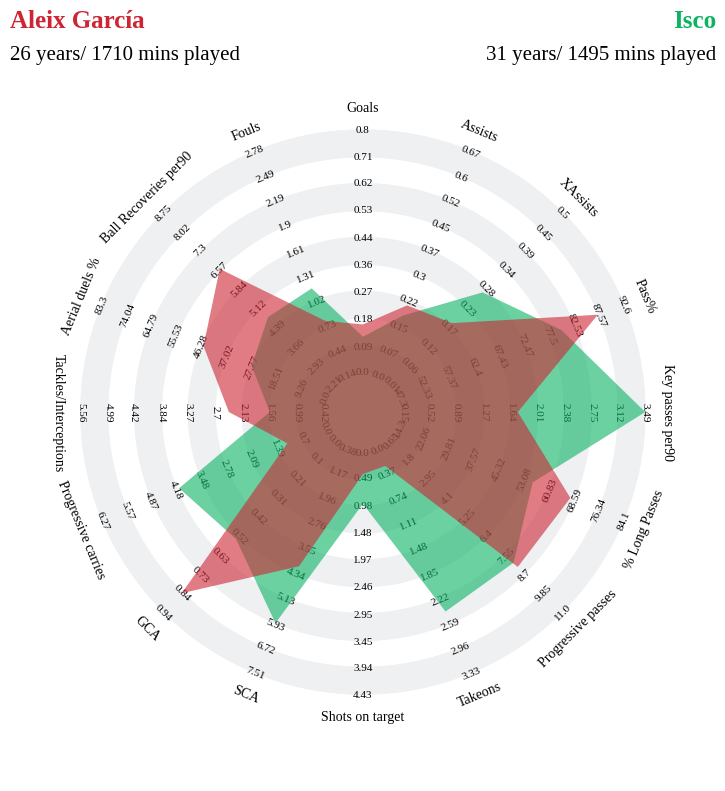

In [ ]:
# Load your datasets, replace 'std_df', 'pass_types_df', 'miscellaneous_df' with your actual dataframes.
std_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
shoot_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_shooting_Stats_Jornada{Jornada}.csv')
gca_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_gca_Stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
defense_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_defense_Stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_misc_Stats_Jornada{Jornada}.csv')



# FILTRAR POR MEDIOCENTROS Y MAS DE UN PARTIDO
std_df = std_df[(std_df['position'].notna() & std_df['position'].str.contains('MF')) & (std_df['minutes_90s']>6)]
shoot_df = shoot_df[(shoot_df['position'].notna() & shoot_df['position'].str.contains('MF')) & (shoot_df['minutes_90s']>6)]
gca_df = gca_df[(gca_df['position'].notna() & gca_df['position'].str.contains('MF')) & (shoot_df['minutes_90s']>6)]
passing_df = passing_df[(passing_df['position'].notna() & passing_df['position'].str.contains('MF')) & (passing_df['minutes_90s']>6)]
defense_df = defense_df[(defense_df['position'].notna() & defense_df['position'].str.contains('MF')) & (defense_df['minutes_90s']>6)]
possession_df = possession_df[(possession_df['position'].notna() & possession_df['position'].str.contains('MF')) & (possession_df['minutes_90s']>6)]
miscellaneous_df = miscellaneous_df[miscellaneous_df['position'].notna() & miscellaneous_df['position'].str.contains('MF')& (miscellaneous_df['minutes_90s']>6)]

# Modify possession dataframe to add a column named takons per game (equal to take_ons_won/matches)
possession_df = possession_df.merge(std_df[['player', 'games']], on='player', how='left')
possession_df['take_ons_won_per90'] = possession_df['take_ons_won'] / possession_df['minutes_90s']     #Take ons won per 90
possession_df['progressive_carries_per90'] = possession_df['progressive_carries'] / possession_df['minutes_90s']   # Progressive carries per 90

passing_df = passing_df.merge(std_df[['player', 'games']], on='player', how='left')
passing_df['key_passes_per90'] = passing_df['assisted_shots'] / passing_df['minutes_90s']      # Key passes per 90
passing_df['progressive_passes_per90'] = passing_df['progressive_passes'] / passing_df['minutes_90s']      # Progressive passes per 90
passing_df['pass_xa_per90'] = passing_df['pass_xa'] / passing_df['minutes_90s']

miscellaneous_df = miscellaneous_df.merge(std_df[['player', 'games']], on='player', how='left')
miscellaneous_df['ball_recoveries_per90'] = miscellaneous_df['ball_recoveries'] / miscellaneous_df['minutes_90s']     #Ball Recoveries 90
miscellaneous_df['fouls_per90'] = miscellaneous_df['fouls'] / miscellaneous_df['games']     #Ball Recoveries 90

defense_df = defense_df.merge(std_df[['player', 'games']], on='player', how='left')
defense_df['tackles_interceptions_per90'] = defense_df['tackles_interceptions'] / defense_df['minutes_90s']     #Ball Recoveries 90

# Filter data for a specific team (replace 'your_team' with your desired team name)
player = 'Aleix García'
color0= '#cd2534'
std_data0 = std_df[std_df['player'] == player]
shoot_data0 = shoot_df[shoot_df['player'] == player]
gca_data0 = gca_df[gca_df['player'] == player]
pass_data0 = passing_df[passing_df['player'] == player]
defense_data0 =  defense_df[defense_df['player'] == player]
possession_data0 = possession_df[possession_df['player'] == player]
miscellaneous_data0 = miscellaneous_df[miscellaneous_df['player'] == player]

age = std_data0["age"].values[0]
minutes_played0 = std_data0["minutes"].values[0]

# Filter data for a specific team (replace 'your_team' with your desired team name
player1 = 'Isco'
color1 = '#0BB363'

std_data1 = std_df[std_df['player'] == player1]
shoot_data1 = shoot_df[shoot_df['player'] == player1]
gca_data1 = gca_df[gca_df['player'] == player1]
pass_data1 = passing_df[passing_df['player'] == player1]
defense_data1 = defense_df[defense_df['player'] == player1]
possession_data1 = possession_df[possession_df['player'] == player1]
miscellaneous_data1 = miscellaneous_df[miscellaneous_df['player'] == player1]

age1 = std_data1["age"].values[0]
minutes_played1 = std_data1["minutes"].values[0]


# Define the radar pie chart categories and values
categories = ['Goals','Assists','XAssists','Pass%','Key passes per90',
              '% Long Passes','Progressive passes','Takeons','Shots on target','SCA',
              'GCA','Progressive carries','Tackles/Interceptions','Aerial duels %',
              'Ball Recoveries per90','Fouls']


values = [
    std_data0['goals_per90'].mean(),
    std_data0['assists_per90'].mean(),
    pass_data0['pass_xa_per90'].mean(),
    pass_data0['passes_pct'].mean(),
    pass_data0['key_passes_per90'].mean(),
    pass_data0['passes_pct_long'].mean(),
    pass_data0['progressive_passes_per90'].mean(),
    possession_data0['take_ons_won_per90'].mean(),
    shoot_data0['shots_on_target_per90'].mean(),
    gca_data0['sca_per90'].mean(),
    gca_data0['gca_per90'].mean(),
    possession_data0['progressive_carries_per90'].mean(),
    defense_data0['tackles_interceptions_per90'].mean(),
    miscellaneous_data0['aerials_won_pct'].mean(),
    miscellaneous_data0['ball_recoveries_per90'].mean(),
    miscellaneous_data0['fouls_per90'].mean(),
]

values1 = [
    std_data1['goals_per90'].mean(),
    std_data1['assists_per90'].mean(),
    pass_data1['pass_xa_per90'].mean(),
    pass_data1['passes_pct'].mean(),
    pass_data1['key_passes_per90'].mean(),
    pass_data1['passes_pct_long'].mean(),
    pass_data1['progressive_passes_per90'].mean(),
    possession_data1['take_ons_won_per90'].mean(),
    shoot_data1['shots_on_target_per90'].mean(),
    gca_data1['sca_per90'].mean(),
    gca_data1['gca_per90'].mean(),
    possession_data1['progressive_carries_per90'].mean(),
    defense_data1['tackles_interceptions_per90'].mean(),
    miscellaneous_data1['aerials_won_pct'].mean(),
    miscellaneous_data1['ball_recoveries_per90'].mean(),
    miscellaneous_data1['fouls_per90'].mean(),
]

# Define ranges for scaling the values
value_ranges = [
    (std_df['goals_per90'].min(), std_df['goals_per90'].max()),    # Goals
    (std_df['assists_per90'].min(), std_df['assists_per90'].max()),    # Assists
    (passing_df['pass_xa_per90'].min(), passing_df['pass_xa_per90'].max()),    # xA
    (passing_df['passes_pct'].min(), passing_df['passes_pct'].max()),    # Percentage of Passes
    (passing_df['key_passes_per90'].min(), passing_df['key_passes_per90'].max()),    # Key passes per 90
    (passing_df['passes_pct_long'].min(), passing_df['passes_pct_long'].max()),    # Percentage long passes
    (passing_df['progressive_passes_per90'].min(), passing_df['progressive_passes_per90'].max()),    # Progressive passes
    (possession_df['take_ons_won_per90'].min(),  possession_df['take_ons_won_per90'].max()), # Take ons percentage
    (shoot_df['shots_on_target_per90'].min(), shoot_df['shots_per90'].max()),  # Shots on target per 90
    (gca_df['sca_per90'].min(),gca_df['sca_per90'].max()), # SCA per 90
    (gca_df['gca_per90'].min(),gca_df['gca_per90'].max()), # GCA per 90
    (possession_df['progressive_carries_per90'].min(), possession_df['progressive_carries_per90'].max()), # Progressive carries per 90
    (defense_df['tackles_interceptions_per90'].min(), defense_df['tackles_interceptions_per90'].max()),  # Tackles percentages
    (miscellaneous_df['aerials_won_pct'].min(), miscellaneous_df['aerials_won_pct'].max()), # Aerial percentage
    (miscellaneous_df['ball_recoveries_per90'].min(),miscellaneous_df['ball_recoveries_per90'].max()),  # Ball recoveries
    (miscellaneous_df['fouls_per90'].min(), miscellaneous_df['fouls_per90'].max()) # Interceptions
]

values= [values1,values]
radar = Radar(patch_color="#EEF0F2",label_fontsize=10,range_fontsize=8) # Initialize the object

title = dict(
    title_name=f'{player}',
    title_color = color0,
    subtitle_name = f'{age} years/ {minutes_played0} mins played',
    subtitle_color = 'black',
    title_name_2=f'{player1}',
    title_color_2 = color1,
    subtitle_name_2 = f'{age1} years/ {minutes_played1} mins played',
    subtitle_color_2 = 'black',
    title_fontsize = 18,
    subtitle_fontsize=15
)

fig,ax = radar.plot_radar(ranges=value_ranges, params=categories,values=values,
                          radar_color = [color1, color0], alphas=[.6,.6],
                          title=title, endnote=None,end_color="white", dpi=600,filename="a",
                          compare=True)



# Midfielder vs mean

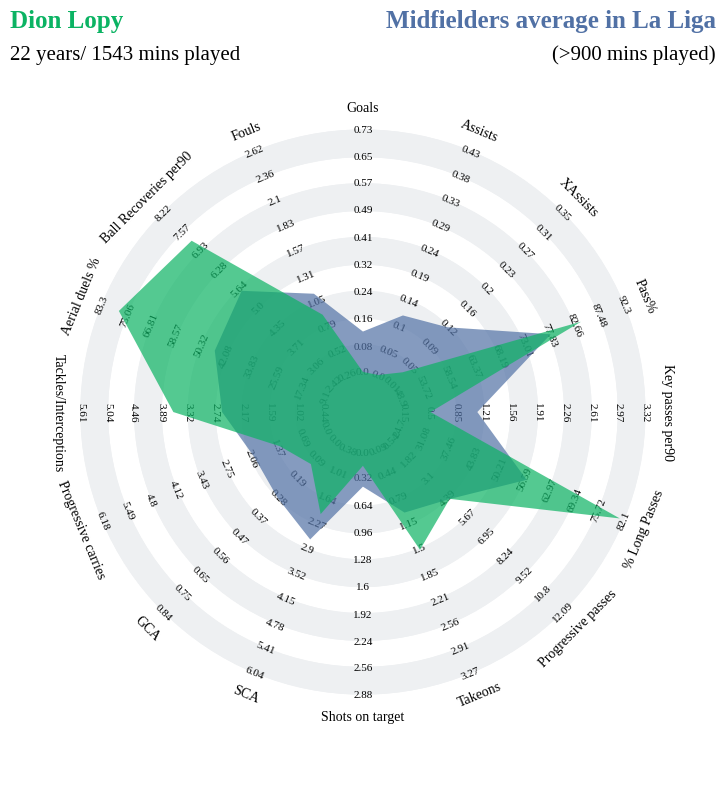

In [ ]:
# Load your datasets, replace 'std_df', 'pass_types_df', 'miscellaneous_df' with your actual dataframes.
std_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
shoot_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_shooting_Stats_Jornada{Jornada}.csv')
gca_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_gca_Stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
defense_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_defense_Stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_misc_Stats_Jornada{Jornada}.csv')

match_th = 10

# FILTRAR POR MEDIOCENTROS Y MAS DE UN PARTIDO
std_df = std_df[(std_df['position'].notna() & std_df['position'].str.contains('MF')) & (std_df['minutes_90s']>match_th)]
shoot_df = shoot_df[(shoot_df['position'].notna() & shoot_df['position'].str.contains('MF')) & (shoot_df['minutes_90s']>match_th)]
gca_df = gca_df[(gca_df['position'].notna() & gca_df['position'].str.contains('MF')) & (shoot_df['minutes_90s']>match_th)]
passing_df = passing_df[(passing_df['position'].notna() & passing_df['position'].str.contains('MF')) & (passing_df['minutes_90s']>match_th)]
defense_df = defense_df[(defense_df['position'].notna() & defense_df['position'].str.contains('MF')) & (defense_df['minutes_90s']>match_th)]
possession_df = possession_df[(possession_df['position'].notna() & possession_df['position'].str.contains('MF')) & (possession_df['minutes_90s']>match_th)]
miscellaneous_df = miscellaneous_df[miscellaneous_df['position'].notna() & miscellaneous_df['position'].str.contains('MF')& (miscellaneous_df['minutes_90s']>match_th)]

# Modify possession dataframe to add a column named takons per game (equal to take_ons_won/matches)
possession_df = possession_df.merge(std_df[['player', 'games']], on='player', how='left')
possession_df['take_ons_won_per90'] = possession_df['take_ons_won'] / possession_df['minutes_90s']     #Take ons won per 90
possession_df['progressive_carries_per90'] = possession_df['progressive_carries'] / possession_df['minutes_90s']   # Progressive carries per 90

passing_df = passing_df.merge(std_df[['player', 'games']], on='player', how='left')
passing_df['key_passes_per90'] = passing_df['assisted_shots'] / passing_df['minutes_90s']      # Key passes per 90
passing_df['progressive_passes_per90'] = passing_df['progressive_passes'] / passing_df['minutes_90s']      # Progressive passes per 90
passing_df['pass_xa_per90'] = passing_df['pass_xa'] / passing_df['minutes_90s']

miscellaneous_df = miscellaneous_df.merge(std_df[['player', 'games']], on='player', how='left')
miscellaneous_df['ball_recoveries_per90'] = miscellaneous_df['ball_recoveries'] / miscellaneous_df['minutes_90s']     #Ball Recoveries 90
miscellaneous_df['fouls_per90'] = miscellaneous_df['fouls'] / miscellaneous_df['games']     #Ball Recoveries 90

defense_df = defense_df.merge(std_df[['player', 'games']], on='player', how='left')
defense_df['tackles_interceptions_per90'] = defense_df['tackles_interceptions'] / defense_df['minutes_90s']     #Ball Recoveries 90

# Filter data for a specific team (replace 'your_team' with your desired team name)
player = 'Dion Lopy'
color0= '#0BB363'
color1= '#5171A5'
std_data0 = std_df[std_df['player'] == player]
shoot_data0 = shoot_df[shoot_df['player'] == player]
gca_data0 = gca_df[gca_df['player'] == player]
pass_data0 = passing_df[passing_df['player'] == player]
defense_data0 =  defense_df[defense_df['player'] == player]
possession_data0 = possession_df[possession_df['player'] == player]
miscellaneous_data0 = miscellaneous_df[miscellaneous_df['player'] == player]

age = std_data0["age"].values[0]
minutes_played0 = std_data0["minutes"].values[0]


# Define the radar pie chart categories and values
categories = ['Goals','Assists','XAssists','Pass%','Key passes per90',
              '% Long Passes','Progressive passes','Takeons','Shots on target','SCA',
              'GCA','Progressive carries','Tackles/Interceptions','Aerial duels %',
              'Ball Recoveries per90','Fouls']


values = [
    std_data0['goals_per90'].mean(),
    std_data0['assists_per90'].mean(),
    pass_data0['pass_xa_per90'].mean(),
    pass_data0['passes_pct'].mean(),
    pass_data0['key_passes_per90'].mean(),
    pass_data0['passes_pct_long'].mean(),
    pass_data0['progressive_passes_per90'].mean(),
    possession_data0['take_ons_won_per90'].mean(),
    shoot_data0['shots_on_target_per90'].mean(),
    gca_data0['sca_per90'].mean(),
    gca_data0['gca_per90'].mean(),
    possession_data0['progressive_carries_per90'].mean(),
    defense_data0['tackles_interceptions_per90'].mean(),
    miscellaneous_data0['aerials_won_pct'].mean(),
    miscellaneous_data0['ball_recoveries_per90'].mean(),
    miscellaneous_data0['fouls_per90'].mean(),
]

values1 = [
    std_df['goals_per90'].mean(),
    std_df['assists_per90'].mean(),
    passing_df['pass_xa_per90'].mean(),
    passing_df['passes_pct'].mean(),
    passing_df['key_passes_per90'].mean(),
    passing_df['passes_pct_long'].mean(),
    passing_df['progressive_passes_per90'].mean(),
    possession_df['take_ons_won_per90'].mean(),
    shoot_df['shots_on_target_per90'].mean(),
    gca_df['sca_per90'].mean(),
    gca_df['gca_per90'].mean(),
    possession_df['progressive_carries_per90'].mean(),
    defense_df['tackles_interceptions_per90'].mean(),
    miscellaneous_df['aerials_won_pct'].mean(),
    miscellaneous_df['ball_recoveries_per90'].mean(),
    miscellaneous_df['fouls_per90'].mean(),
]

# Define ranges for scaling the values
value_ranges = [
    (std_df['goals_per90'].min(), std_df['goals_per90'].max()),    # Goals
    (std_df['assists_per90'].min(), std_df['assists_per90'].max()),    # Assists
    (passing_df['pass_xa_per90'].min(), passing_df['pass_xa_per90'].max()),    # xA
    (passing_df['passes_pct'].min(), passing_df['passes_pct'].max()),    # Percentage of Passes
    (passing_df['key_passes_per90'].min(), passing_df['key_passes_per90'].max()),    # Key passes per 90
    (passing_df['passes_pct_long'].min(), passing_df['passes_pct_long'].max()),    # Percentage long passes
    (passing_df['progressive_passes_per90'].min(), passing_df['progressive_passes_per90'].max()),    # Progressive passes
    (possession_df['take_ons_won_per90'].min(),  possession_df['take_ons_won_per90'].max()), # Take ons percentage
    (shoot_df['shots_on_target_per90'].min(), shoot_df['shots_per90'].max()),  # Shots on target per 90
    (gca_df['sca_per90'].min(),gca_df['sca_per90'].max()), # SCA per 90
    (gca_df['gca_per90'].min(),gca_df['gca_per90'].max()), # GCA per 90
    (possession_df['progressive_carries_per90'].min(), possession_df['progressive_carries_per90'].max()), # Progressive carries per 90
    (defense_df['tackles_interceptions_per90'].min(), defense_df['tackles_interceptions_per90'].max()),  # Tackles percentages
    (miscellaneous_df['aerials_won_pct'].min(), miscellaneous_df['aerials_won_pct'].max()), # Aerial percentage
    (miscellaneous_df['ball_recoveries_per90'].min(),miscellaneous_df['ball_recoveries_per90'].max()),  # Ball recoveries
    (miscellaneous_df['fouls_per90'].min(), miscellaneous_df['fouls_per90'].max()) # Interceptions
]

values= [values1,values]
radar = Radar(patch_color="#EEF0F2",label_fontsize=10,range_fontsize=8) # Initialize the object

title = dict(
    title_name=f'{player}',
    title_color = color0,
    subtitle_name = f'{age} years/ {minutes_played0} mins played',
    subtitle_color = 'black',
    title_name_2=f'Midfielders average in La Liga',
    title_color_2 = color1,
    subtitle_name_2 = f'(>{match_th*90} mins played)',
    subtitle_color_2 = 'black',
    title_fontsize = 18,
    subtitle_fontsize=15
)

fig,ax = radar.plot_radar(ranges=value_ranges, params=categories,values=values,
                          radar_color = [color1, color0], alphas=[.7,.7],
                          title=title, endnote=None,end_color="white", dpi=600,filename="a",
                          compare=True)



## Defender Comparison


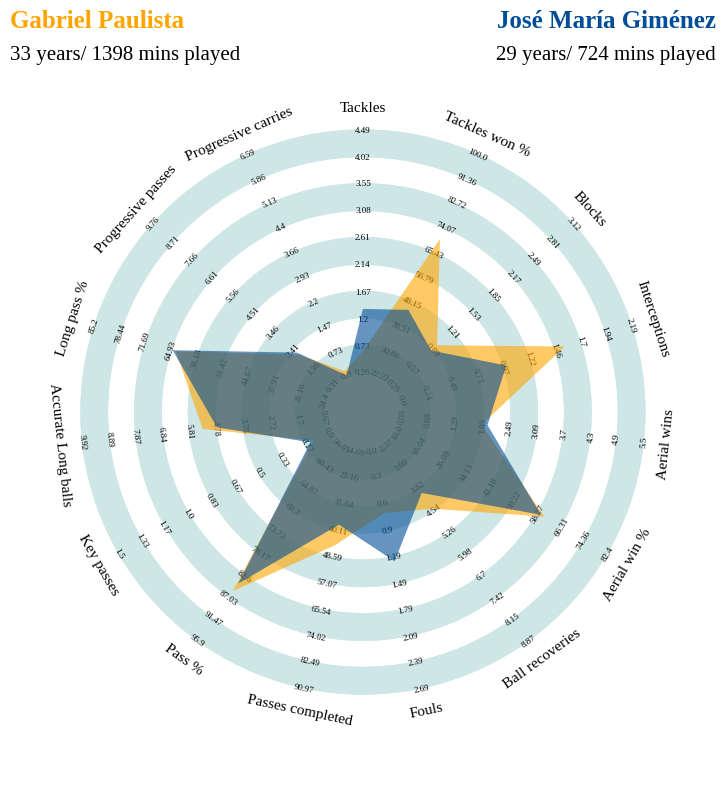

In [ ]:
# Load your datasets, replace 'std_df', 'pass_types_df', 'miscellaneous_df' with your actual dataframes.
std_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
defense_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_defense_Stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_misc_Stats_Jornada{Jornada}.csv')



# FILTRAR POR DEFENSAS Y MAS DE UN PARTIDO
std_df = std_df[(std_df['position'].notna() & std_df['position'].str.contains('DF')) & (std_df['minutes_90s']>3)]
passing_df = passing_df[(passing_df['position'].notna() & passing_df['position'].str.contains('DF')) & (passing_df['minutes_90s']>3)]
defense_df = defense_df[(defense_df['position'].notna() & defense_df['position'].str.contains('DF')) & (defense_df['minutes_90s']>3)]
possession_df = possession_df[(possession_df['position'].notna() & possession_df['position'].str.contains('DF')) & (possession_df['minutes_90s']>3)]
miscellaneous_df = miscellaneous_df[miscellaneous_df['position'].notna() & miscellaneous_df['position'].str.contains('DF')& (miscellaneous_df['minutes_90s']>3)]

# Modify possession dataframe to add a column named PROGRESSIVE CARRIES
possession_df = possession_df.merge(std_df[['player', 'games']], on='player', how='left')
possession_df['progressive_carries_per90'] = possession_df['progressive_carries'] / possession_df['minutes_90s']   # Progressive carries per 90

passing_df = passing_df.merge(std_df[['player', 'games']], on='player', how='left')
passing_df['key_passes_per90'] = passing_df['assisted_shots'] / passing_df['games']      # Key passes per 90
passing_df['progressive_passes_per90'] = passing_df['progressive_passes'] / passing_df['minutes_90s']      # Progressive passes per 90
passing_df['passes_completed_long_per90'] = passing_df['passes_completed_long'] / passing_df['minutes_90s']   # Passes long per 90
passing_df['passes_per90'] = passing_df['passes_completed'] / passing_df['minutes_90s']    # Passes per 90

miscellaneous_df = miscellaneous_df.merge(std_df[['player', 'games']], on='player', how='left')
miscellaneous_df['ball_recoveries_per90'] = miscellaneous_df['ball_recoveries'] / miscellaneous_df['minutes_90s']     #Ball Recoveries 90
miscellaneous_df['fouls_per90'] = miscellaneous_df['fouls'] / miscellaneous_df['minutes_90s']     #Fouls per 90
miscellaneous_df['aerials_won_per90'] = miscellaneous_df['aerials_won'] / miscellaneous_df['minutes_90s']     #Aerial wins per 90

defense_df = defense_df.merge(std_df[['player', 'games']], on='player', how='left')
defense_df['tackles_per90'] = defense_df['tackles'] / defense_df['minutes_90s']     #Tackles per90
defense_df['tackles_won_pct'] = (defense_df['tackles_won'] / defense_df['tackles'])*100 # Tackles pct
defense_df['blocks_per90'] = defense_df['blocks'] / defense_df['minutes_90s']     #Tackles per90
defense_df['interceptions_per90'] = defense_df['interceptions'] / defense_df['minutes_90s']     #Tackles per90

# Filter data for a specific team (replace 'your_team' with your desired team name)
player = 'Gabriel Paulista'
color0 = 'orange'
std_data0 = std_df[std_df['player'] == player]
pass_data0 = passing_df[passing_df['player'] == player]
defense_data0 =  defense_df[defense_df['player'] == player]
possession_data0 = possession_df[possession_df['player'] == player]
miscellaneous_data0 = miscellaneous_df[miscellaneous_df['player'] == player]

age = std_data0["age"].values[0]
minutes_played0 = std_data0["minutes"].values[0]

# Filter data for a specific team (replace 'your_team' with your desired team name)
player1 = 'José María Giménez'
color1 = '#004D98'
std_data1 = std_df[std_df['player'] == player1]
pass_data1 = passing_df[passing_df['player'] == player1]
defense_data1 = defense_df[defense_df['player'] == player1]
possession_data1 = possession_df[possession_df['player'] == player1]
miscellaneous_data1 = miscellaneous_df[miscellaneous_df['player'] == player1]

age1 = std_data1["age"].values[0]
minutes_played1 = std_data1["minutes"].values[0]


# Define the radar pie chart categories and values
categories = ['Tackles','Tackles won %','Blocks','Interceptions','Aerial wins','Aerial win %','Ball recoveries',
              'Fouls','Passes completed','Pass %','Key passes','Accurate Long balls','Long pass %','Progressive passes',
              'Progressive carries']


values = [
    defense_data0['tackles_per90'].mean(),
    defense_data0['tackles_won_pct'].mean(),
    defense_data0['blocks_per90'].mean(),
    defense_data0['interceptions_per90'].mean(),
    miscellaneous_data0['aerials_won_per90'].mean(),
    miscellaneous_data0['aerials_won_pct'].mean(),
    miscellaneous_data0['ball_recoveries_per90'].mean(),
    miscellaneous_data0['fouls_per90'].mean(),
    pass_data0['passes_per90'].mean(),
    pass_data0['passes_pct'].mean(),
    pass_data0['key_passes_per90'].mean(),
    pass_data0['passes_completed_long_per90'].mean(),
    pass_data0['passes_pct_long'].mean(),
    pass_data0['progressive_passes_per90'].mean(),
    possession_data0['progressive_carries_per90'].mean(),
]

values1 = [
    defense_data1['tackles_per90'].mean(),
    defense_data1['tackles_won_pct'].mean(),
    defense_data1['blocks_per90'].mean(),
    defense_data1['interceptions_per90'].mean(),
    miscellaneous_data1['aerials_won_per90'].mean(),
    miscellaneous_data1['aerials_won_pct'].mean(),
    miscellaneous_data1['ball_recoveries_per90'].mean(),
    miscellaneous_data1['fouls_per90'].mean(),
    pass_data1['passes_per90'].mean(),
    pass_data1['passes_pct'].mean(),
    pass_data1['key_passes_per90'].mean(),
    pass_data1['passes_completed_long_per90'].mean(),
    pass_data1['passes_pct_long'].mean(),
    pass_data1['progressive_passes_per90'].mean(),
    possession_data1['progressive_carries_per90'].mean(),
]

# Define ranges for scaling the values
value_ranges = [
    (defense_df['tackles_per90'].min(),defense_df['tackles_per90'].max()),    # Tackles
    (defense_df['tackles_won_pct'].min(),defense_df['tackles_won_pct'].max()),    # Tackles won %
    (defense_df['blocks_per90'].min(),defense_df['blocks_per90'].max()),    # Blocks
    (defense_df['interceptions_per90'].min(),defense_df['interceptions_per90'].max()),    # Interceptions
    (miscellaneous_df['aerials_won_per90'].min(),miscellaneous_df['aerials_won_per90'].max()),    # Aerial wins
    (miscellaneous_df['aerials_won_pct'].min(),miscellaneous_df['aerials_won_pct'].max()),    # Aerial sin %
    (miscellaneous_df['ball_recoveries_per90'].min(),miscellaneous_df['ball_recoveries_per90'].max()),    # Ball recoveries
    (miscellaneous_df['fouls_per90'].min(),miscellaneous_df['fouls_per90'].max()),  # Fouls per 90
    (passing_df['passes_per90'].min(),passing_df['passes_per90'].max()), # Passes per 90
    (passing_df['passes_pct'].min(),passing_df['passes_pct'].max()),  # Passes pct
    (passing_df['key_passes_per90'].min(),passing_df['key_passes_per90'].max() ), # Key passes
    (passing_df['passes_completed_long_per90'].min(),passing_df['passes_completed_long_per90'].max()),  # Long passes completed
    (passing_df['passes_pct_long'].min(),passing_df['passes_pct_long'].max()), # Long passes %
    (passing_df['progressive_passes_per90'].min(),passing_df['progressive_passes_per90'].max()), # Progressive passes
    (possession_df['progressive_carries_per90'].min(),possession_df['progressive_carries_per90'].max()) #Progressive carries
]

values= [values,values1]
radar = Radar(patch_color="#CEE7E6",label_fontsize=11,range_fontsize=6.5) # Initialize the object

title = dict(
    title_name=f'{player}',
    title_color = color0,
    subtitle_name = f'{age} years/ {minutes_played0} mins played',
    subtitle_color = 'black',
    title_name_2=f'{player1}',
    title_color_2 = color1,
    subtitle_name_2 = f'{age1} years/ {minutes_played1} mins played',
    subtitle_color_2 = 'black',
    title_fontsize = 18,
    subtitle_fontsize=15
)

fig,ax = radar.plot_radar(ranges=value_ranges, params=categories,values=values,
                          radar_color = [color0,color1], alphas=[.6,.6],
                          title=title, endnote=None,end_color="white", dpi=600,filename="a",
                          compare=True)



# Defender vs mean

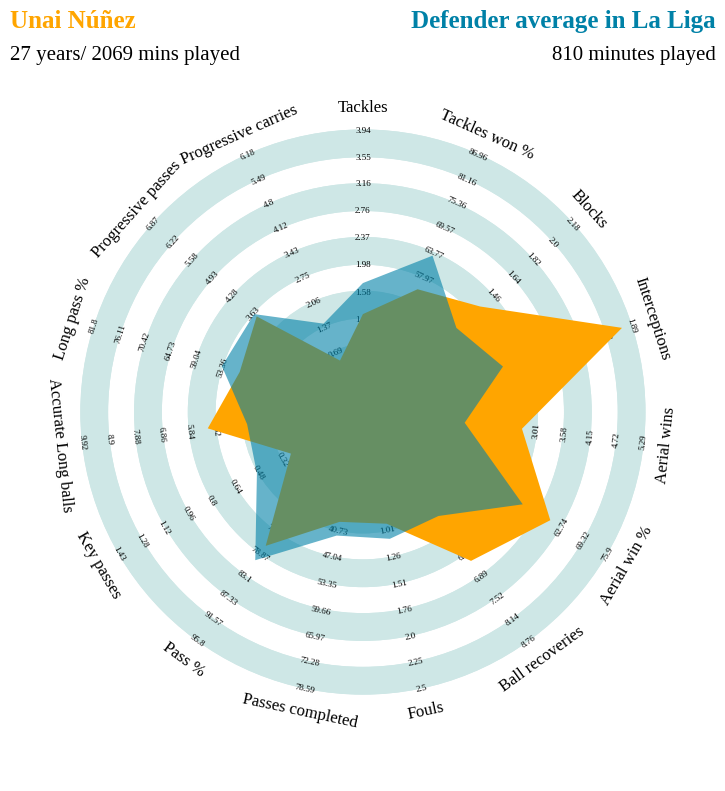

In [ ]:
# Load your datasets, replace 'std_df', 'pass_types_df', 'miscellaneous_df' with your actual dataframes.
std_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
defense_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_defense_Stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_misc_Stats_Jornada{Jornada}.csv')


match_th = 9
# FILTRAR POR DEFENSAS Y MAS DE UN PARTIDO
std_df = std_df[(std_df['position'].notna() & std_df['position'].str.contains('DF')) & (std_df['minutes_90s']>match_th)]
passing_df = passing_df[(passing_df['position'].notna() & passing_df['position'].str.contains('DF')) & (passing_df['minutes_90s']>match_th)]
defense_df = defense_df[(defense_df['position'].notna() & defense_df['position'].str.contains('DF')) & (defense_df['minutes_90s']>match_th)]
possession_df = possession_df[(possession_df['position'].notna() & possession_df['position'].str.contains('DF')) & (possession_df['minutes_90s']>match_th)]
miscellaneous_df = miscellaneous_df[miscellaneous_df['position'].notna() & miscellaneous_df['position'].str.contains('DF')& (miscellaneous_df['minutes_90s']>match_th)]

# Modify possession dataframe to add a column named PROGRESSIVE CARRIES
possession_df = possession_df.merge(std_df[['player', 'games']], on='player', how='left')
possession_df['progressive_carries_per90'] = possession_df['progressive_carries'] / possession_df['minutes_90s']   # Progressive carries per 90

passing_df = passing_df.merge(std_df[['player', 'games']], on='player', how='left')
passing_df['key_passes_per90'] = passing_df['assisted_shots'] / passing_df['games']      # Key passes per 90
passing_df['progressive_passes_per90'] = passing_df['progressive_passes'] / passing_df['minutes_90s']      # Progressive passes per 90
passing_df['passes_completed_long_per90'] = passing_df['passes_completed_long'] / passing_df['minutes_90s']   # Passes long per 90
passing_df['passes_per90'] = passing_df['passes_completed'] / passing_df['minutes_90s']    # Passes per 90

miscellaneous_df = miscellaneous_df.merge(std_df[['player', 'games']], on='player', how='left')
miscellaneous_df['ball_recoveries_per90'] = miscellaneous_df['ball_recoveries'] / miscellaneous_df['minutes_90s']     #Ball Recoveries 90
miscellaneous_df['fouls_per90'] = miscellaneous_df['fouls'] / miscellaneous_df['minutes_90s']     #Fouls per 90
miscellaneous_df['aerials_won_per90'] = miscellaneous_df['aerials_won'] / miscellaneous_df['minutes_90s']     #Aerial wins per 90

defense_df = defense_df.merge(std_df[['player', 'games']], on='player', how='left')
defense_df['tackles_per90'] = defense_df['tackles'] / defense_df['minutes_90s']     #Tackles per90
defense_df['tackles_won_pct'] = (defense_df['tackles_won'] / defense_df['tackles'])*100 # Tackles pct
defense_df['blocks_per90'] = defense_df['blocks'] / defense_df['minutes_90s']     #Tackles per90
defense_df['interceptions_per90'] = defense_df['interceptions'] / defense_df['minutes_90s']     #Tackles per90

# Filter data for a specific team (replace 'your_team' with your desired team name)
player = 'Unai Núñez'
color0 = 'orange'
std_data0 = std_df[std_df['player'] == player]
pass_data0 = passing_df[passing_df['player'] == player]
defense_data0 =  defense_df[defense_df['player'] == player]
possession_data0 = possession_df[possession_df['player'] == player]
miscellaneous_data0 = miscellaneous_df[miscellaneous_df['player'] == player]

age = std_data0["age"].values[0]
minutes_played0 = std_data0["minutes"].values[0]


# Define the radar pie chart categories and values
categories = ['Tackles','Tackles won %','Blocks','Interceptions','Aerial wins','Aerial win %','Ball recoveries',
              'Fouls','Passes completed','Pass %','Key passes','Accurate Long balls','Long pass %','Progressive passes',
              'Progressive carries']

color1 = "#0081A7"
values = [
    defense_data0['tackles_per90'].mean(),
    defense_data0['tackles_won_pct'].mean(),
    defense_data0['blocks_per90'].mean(),
    defense_data0['interceptions_per90'].mean(),
    miscellaneous_data0['aerials_won_per90'].mean(),
    miscellaneous_data0['aerials_won_pct'].mean(),
    miscellaneous_data0['ball_recoveries_per90'].mean(),
    miscellaneous_data0['fouls_per90'].mean(),
    pass_data0['passes_per90'].mean(),
    pass_data0['passes_pct'].mean(),
    pass_data0['key_passes_per90'].mean(),
    pass_data0['passes_completed_long_per90'].mean(),
    pass_data0['passes_pct_long'].mean(),
    pass_data0['progressive_passes_per90'].mean(),
    possession_data0['progressive_carries_per90'].mean(),
]

values1 = [
    defense_df['tackles_per90'].mean(),
    defense_df['tackles_won_pct'].mean(),
    defense_df['blocks_per90'].mean(),
    defense_df['interceptions_per90'].mean(),
    miscellaneous_df['aerials_won_per90'].mean(),
    miscellaneous_df['aerials_won_pct'].mean(),
    miscellaneous_df['ball_recoveries_per90'].mean(),
    miscellaneous_df['fouls_per90'].mean(),
    passing_df['passes_per90'].mean(),
    passing_df['passes_pct'].mean(),
    passing_df['key_passes_per90'].mean(),
    passing_df['passes_completed_long_per90'].mean(),
    passing_df['passes_pct_long'].mean(),
    passing_df['progressive_passes_per90'].mean(),
    possession_df['progressive_carries_per90'].mean(),
]

# Define ranges for scaling the values
value_ranges = [
    (defense_df['tackles_per90'].min(),defense_df['tackles_per90'].max()),    # Tackles
    (defense_df['tackles_won_pct'].min(),defense_df['tackles_won_pct'].max()),    # Tackles won %
    (defense_df['blocks_per90'].min(),defense_df['blocks_per90'].max()),    # Blocks
    (defense_df['interceptions_per90'].min(),defense_df['interceptions_per90'].max()),    # Interceptions
    (miscellaneous_df['aerials_won_per90'].min(),miscellaneous_df['aerials_won_per90'].max()),    # Aerial wins
    (miscellaneous_df['aerials_won_pct'].min(),miscellaneous_df['aerials_won_pct'].max()),    # Aerial sin %
    (miscellaneous_df['ball_recoveries_per90'].min(),miscellaneous_df['ball_recoveries_per90'].max()),    # Ball recoveries
    (miscellaneous_df['fouls_per90'].min(),miscellaneous_df['fouls_per90'].max()),  # Fouls per 90
    (passing_df['passes_per90'].min(),passing_df['passes_per90'].max()), # Passes per 90
    (passing_df['passes_pct'].min(),passing_df['passes_pct'].max()),  # Passes pct
    (passing_df['key_passes_per90'].min(),passing_df['key_passes_per90'].max() ), # Key passes
    (passing_df['passes_completed_long_per90'].min(),passing_df['passes_completed_long_per90'].max()),  # Long passes completed
    (passing_df['passes_pct_long'].min(),passing_df['passes_pct_long'].max()), # Long passes %
    (passing_df['progressive_passes_per90'].min(),passing_df['progressive_passes_per90'].max()), # Progressive passes
    (possession_df['progressive_carries_per90'].min(),possession_df['progressive_carries_per90'].max()) #Progressive carries
]

values= [values,values1]
radar = Radar(patch_color="#CEE7E6",label_fontsize=12,range_fontsize=6.5) # Initialize the object

title = dict(
    title_name=f'{player}',
    title_color = color0,
    subtitle_name = f'{age} years/ {minutes_played0} mins played',
    subtitle_color = 'black',
    title_name_2=f'Defender average in La Liga',
    title_color_2 = color1,
    subtitle_name_2 = f'{match_th*90} minutes played',
    subtitle_color_2 = 'black',
    title_fontsize = 18,
    subtitle_fontsize=15
)

fig,ax = radar.plot_radar(ranges=value_ranges, params=categories,values=values,
                          radar_color = [color0,color1], alphas=[1,.6],
                          title=title, endnote=None,end_color="white", dpi=800,filename="a",
                          compare=True)



In [ ]:
!pip install mplsoccer


## **Player Statistics**

In [ ]:
from mplsoccer import PyPizza, add_image, FontManager
name = "Nico Williams"

std_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
shoot_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_shooting_Stats_Jornada{Jornada}.csv')
gca_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_gca_Stats_Jornada{Jornada}.csv')
passing_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
defense_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_defense_Stats_Jornada{Jornada}.csv')
possession_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_misc_Stats_Jornada{Jornada}.csv')

position = (std_df[std_df['player']==name])['position'].values[0]
team = (std_df[std_df['player']==name])['team'].values[0]

std_df = std_df[(std_df['position'].notna() & std_df['position'].str.contains(position)) & (std_df['minutes_90s']>1)]
shoot_df = shoot_df[(shoot_df['position'].notna() & shoot_df['position'].str.contains(position)) & (shoot_df['minutes_90s']>1)]
gca_df = gca_df[(gca_df['position'].notna() & gca_df['position'].str.contains(position)) & (gca_df['minutes_90s']>1)]
passing_df = passing_df[(passing_df['position'].notna() & passing_df['position'].str.contains(position)) & (passing_df['minutes_90s']>1)]
defense_df = defense_df[(defense_df['position'].notna() & defense_df['position'].str.contains(position)) & (defense_df['minutes_90s']>1)]
possession_df = possession_df[(possession_df['position'].notna() & possession_df['position'].str.contains(position)) & (possession_df['minutes_90s']>1)]
miscellaneous_df = miscellaneous_df[miscellaneous_df['position'].notna() & miscellaneous_df['position'].str.contains(position)& (miscellaneous_df['minutes_90s']>1)]

passing_df['passes_attempted_per90'] = passing_df['passes_completed']/passing_df['minutes_90s']
passing_df['progressive_passes_per90'] = passing_df['progressive_passes'] / passing_df['minutes_90s']      # Progressive passes per 90
passing_df['key_passes_per90'] = passing_df['assisted_shots'] / passing_df['minutes_90s']      # Key passes per 90
passing_df['passes_into_finalthird_per90'] = passing_df['passes_into_final_third'] / passing_df['minutes_90s']

possession_df['take_ons_won_per90'] = possession_df['take_ons_won'] / possession_df['minutes_90s']
possession_df['progressive_carries_per90'] = possession_df['progressive_carries'] / possession_df['minutes_90s']
possession_df['touches_att_pen_area_per90'] = possession_df['touches_att_pen_area'] / possession_df['minutes_90s']

defense_df['tackles_won_per90'] = defense_df['tackles_won'] / defense_df['minutes_90s']
defense_df['blocks_per90'] = defense_df['blocks'] / defense_df['minutes_90s']
defense_df['interceptions_per90'] = defense_df['interceptions'] / defense_df['minutes_90s']

miscellaneous_df['ball_recoveries_per90'] = miscellaneous_df['ball_recoveries'] / miscellaneous_df['minutes_90s']     #Ball Recoveries 90
miscellaneous_df['fouls_per90'] = miscellaneous_df['fouls'] / miscellaneous_df['minutes_90s']     #Fouls per 90
miscellaneous_df['aerials_won_per90'] = miscellaneous_df['aerials_won'] / miscellaneous_df['minutes_90s']     #Aerial wins per 90

std_cat = ["goals_per90","xg_per90","assists_per90","xg_assist_per90"]
sc_cat = ["sca_per90","gca_per90"]
pass_cat = ["passes_attempted_per90","passes_pct","progressive_passes_per90","key_passes_per90","passes_into_finalthird_per90"]
possession_cat = ["take_ons_won_per90","progressive_carries_per90","touches_att_pen_area_per90"]
defense_cat = ["tackles_won_per90","blocks_per90","interceptions_per90"]
misc_cat =["ball_recoveries_per90","fouls_per90","aerials_won_per90"]

data_to_concat = []
result_df = pd.DataFrame(columns=['Category', 'Value', 'Percentile'])

# Loop through each category and its corresponding dataset
for category_name, category_values in zip(['Standard','GCA','Passing','Possession','Defense','Miscellaneous'],
                                           [std_cat,sc_cat,pass_cat, possession_cat, defense_cat,misc_cat]):
    if category_name == 'Standard':
        dataset = std_df
    elif category_name == 'GCA':
        dataset = gca_df
    elif category_name == 'Passing':
        dataset = passing_df
    elif category_name == 'Possession':
        dataset = possession_df
    elif category_name == 'Defense':
        dataset = defense_df
    elif category_name == 'Miscellaneous':
        dataset = miscellaneous_df

    for feature in category_values:
        player_data = dataset.loc[dataset['player'] == name]
        player_value = player_data[feature].values[0]
        percentile0 = int(stats.percentileofscore(dataset[feature], player_value, kind='rank'))
        data_to_concat.append(pd.DataFrame({'Category': [feature],
                                            'Value': [player_value.round(2)],
                                            'Percentile': [percentile0]}))
    result_df = pd.concat(data_to_concat, ignore_index=True)


# Rename the categories for a smoother visualization
category_mapping = {
    'goals_per90': 'Goals',
    'xg_per90': 'xG',
    'assists_per90': 'Assists',
    'xg_assist_per90': 'XA',
    'sca_per90': 'SCA',
    'gca_per90': 'GCA',
    'passes_attempted_per90': 'Passes',
    'passes_pct': 'Pass\n completion %',
    'progressive_passes_per90': 'Progr.\n Passes',
    'key_passes_per90': 'Key Passes',
    'passes_into_finalthird_per90': 'Passes\n final1/3',
    'take_ons_won_per90': 'Takeons won',
    'progressive_carries_per90': 'Progr.\n Carries',
    'touches_att_pen_area_per90': 'Touches\n att area',
    'tackles_won_per90': 'Tackles won',
    'blocks_per90': 'Blocks',
    'interceptions_per90': 'Interceptions',
    'ball_recoveries_per90': 'Ball\n Recoveries',
    'fouls_per90': 'Fouls',
    'aerials_won_per90': 'Aerials won'
}
# Replace the categories' names
result_df['Category'] = result_df['Category'].replace(category_mapping)

ValueError: cannot convert float NaN to integer

In [ ]:
dataset[feature]

5      0.198020
14     1.071429
16     0.188679
23     1.851852
24     1.363636
         ...   
543    0.666667
545    0.155039
546    3.090909
547    1.379310
549    0.219780
Name: aerials_won_per90, Length: 163, dtype: float64

In [ ]:
# Replace the categories' names
result_df['Category'] = result_df['Category'].replace(category_mapping)
values = result_df['Percentile']
slice_colors = ["#449DD1"] * 6 + ["#C2ED81"] * 5 + ["#6F2DBD"] * 3 + ['#F55D3E'] *6

baker = PyPizza(
    params=result_df['Category'],                  # list of parameters
    background_color="white",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    #value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="white", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, f"{name}-{team}", size=16,
    ha="center", color="#000000",fontweight='bold'
)

# add subtitle
fig.text(
    0.515, 0.953,
    f"Percentile Rank against {position} per 90 min | Season 2023-24",
    size=13,
    ha="center",color="#000000"
)

# add text
fig.text(
    0.25, 0.925, "Attacking        Passing       Possession      Defending", size=12,
    color="#000000"
)
# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.22, 0.9225), 0.025, 0.021, fill=True, color="#449DD1",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.37, 0.9225), 0.025, 0.021, fill=True, color="#C2ED81",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.495, 0.9225), 0.025, 0.021, fill=True, color="#6F2DBD",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.647, 0.9225), 0.025, 0.021, fill=True, color="#F55D3E",
        transform=fig.transFigure, figure=fig
    ),
])
URL = "/content/drive/MyDrive/LaLiga/PlayerPics/nicowilliams.png"
fdj_cropped = Image.open(URL)
ax_image = add_image(
    fdj_cropped, fig, left=0.4467, bottom=0.4405, width=0.13, height=0.115
)   # these values might differ when you are plotting

plt.show()

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 800x850 with 2 Axes>

## Team Statistics per player

In [ ]:
# This dictionary points each team name (Team) to each corresponding crest image file (Crest). The crests are stored within a folder that will be point to later with that exact name
team_data = [
 {'Team': 'Alavés', 'Crest': 'Alaves.png', 'Color': '#0761AF'},
 {'Team': 'Almería', 'Crest': 'Almeria.png', 'Color': '#ee1119'},
 {'Team': 'Athletic Club', 'Crest': 'Athletic.png', 'Color': '#EE2523'},
 {'Team': 'Atlético Madrid', 'Crest': 'AtleticoMadrid.png', 'Color': '#CB3524'},
 {'Team': 'Barcelona', 'Crest': 'Barcelona.png', 'Color': '#A50044'},
 {'Team': 'Betis', 'Crest': 'Betis.png', 'Color': '#0BB363'},
 {'Team': 'Cádiz', 'Crest': 'Cadiz.png', 'Color': 'ffe500'},
 {'Team': 'Celta Vigo', 'Crest': 'Celta.png', 'Color': '#8AC3EE'},
 {'Team': 'Getafe', 'Crest': 'Getafe.png', 'Color': ' #005999'},
 {'Team': 'Girona', 'Crest': 'Girona.png', 'Color': 'ff0000'},
 {'Team': 'Granada', 'Crest': 'Granada.png', 'Color': '#A61B2B'},
 {'Team': 'Las Palmas', 'Crest': 'LasPalmas.png', 'Color': '#c6da36'},
 {'Team': 'Mallorca', 'Crest': 'Mallorca.png', 'Color': '#E20613'},
 {'Team': 'Osasuna', 'Crest': 'Osasuna.png', 'Color': '#D91A21'},
 {'Team': 'Rayo Vallecano', 'Crest': 'RayoVallecano.png', 'Color': 'ff0000'},
 {'Team': 'Real Madrid', 'Crest': 'RealMadrid.png', 'Color': '#FFFFFF'},
 {'Team': 'Real Sociedad', 'Crest': 'RealSociedad.png', 'Color': '#0067B1'},
 {'Team': 'Sevilla', 'Crest': 'Sevilla.png', 'Color': '#F43333'},
 {'Team': 'Valencia', 'Crest': 'Valencia.png', 'Color': '#D18816'},
 {'Team': 'Villarreal', 'Crest': 'Villareal.png', 'Color': '#FFE667'}
]

In [ ]:
def display_teams():
    for index, team in enumerate(team_data):
        print(f"{index + 1}. {team['Team']}")

def select_team():
    while True:
        try:
            choice = input("Enter the number of the team you want to select: ")
            selected_team = team_data[int(choice) - 1]
            return selected_team
        except (IndexError, ValueError):
            print("Invalid selection. Please try again.")

def operating_team(team):
    std_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
    gca_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_gca_Stats_Jornada{Jornada}.csv')
    passing_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
    defense_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_defense_Stats_Jornada{Jornada}.csv')
    possession_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
    miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_misc_Stats_Jornada{Jornada}.csv')


    std_df=std_df[std_df['team']==team]
    gca_df=gca_df[gca_df['team']==team]
    passing_df=passing_df[passing_df['team']==team]
    defense_df=defense_df[defense_df['team']==team]
    possession_df=possession_df[possession_df['team']==team]
    miscellaneous_df=miscellaneous_df[miscellaneous_df['team']==team]

    team_df = pd.DataFrame(columns=['Category', 'Name', 'Value'])

    std_c=["goals","xg","minutes","assists","xg_assist","pens_made"]
    pass_c=["passes_completed","assisted_shots","passes_into_final_third","passes_into_penalty_area","progressive_passes"]
    gca_c=["sca","gca"]
    misc_c=["cards_yellow","cards_red","fouls","fouled","offsides","ball_recoveries","aerials_won"]
    possession_c=["touches_att_pen_area","take_ons_won","progressive_carries"]
    defense_c=["tackles_won","blocks","interceptions"]

    data_to_concat2 = []
    # Loop through each category and its corresponding dataset
    for category_name, category_values in zip(['Standard','Passing','GCA','Miscellaneous','Possession','Defense'],
                                              [std_c,pass_c,gca_c,misc_c,possession_c,defense_c]):
        if category_name == 'Standard':
            dataset = std_df
        elif category_name == 'GCA':
            dataset = gca_df
        elif category_name == 'Passing':
            dataset = passing_df
        elif category_name == 'Possession':
            dataset = possession_df
        elif category_name == 'Defense':
            dataset = defense_df
        elif category_name == 'Miscellaneous':
            dataset = miscellaneous_df

        for feature in category_values:
            row = dataset[dataset[feature] == dataset[feature].max()]
            player_name = row['player'].values[0]
            player_value = row[feature].values[0]
            data_to_concat2.append(pd.DataFrame({'Category': [feature],
                                                 'Name': [player_name],
                                                'Value': [player_value]
                                                }))

        team_df = pd.concat(data_to_concat2, ignore_index=True)



    defense_c=["tackles_won","blocks","interceptions"]
    category_mapping = {
    'goals': 'Goals',
    'xg': 'Expected Goals',
    'minutes': 'Minutes',
    'assists': 'Assists',
    'xg_assist': 'Expected Assists',
    'pens_made': 'Penalties made',
    'passes_completed': 'Passes completados',
    'assisted_shots': 'Key Passes',
    'passes_into_final_third': 'Passes into final third',
    'passes_into_penalty_area': 'Passes into penalty area',
    'progressive_passes': 'Progressive Passes',
    'sca': 'Shot Creating Actions',
    'gca': 'Goal Creating Actions',
    'cards_yellow': 'Yellow Cards',
    'cards_red': 'Red Cards',
    'fouls': 'Fouls made',
    'fouled': 'Fouls received',
    'offsides': 'Offsides',
    'ball_recoveries': 'Ball Recoveries',
    'aerials_won': 'Aerials won',
    'touches_att_pen_area': 'Touches pen area',
    'take_ons_won': 'Takeons won',
    'progressive_carries': 'Progressive carries',
    'tackles_won': 'Tackles won',
    'blocks': 'Blocks',
    'interceptions': 'Interceptions',
    }
    # Replace the categories' names
    team_df['Category'] = team_df['Category'].replace(category_mapping)
    print(team_df)
    team_df.to_csv(f'/content/{team}.csv',index=False)
    return team_df


def main():
    print("Select a Football Team:")
    display_teams()
    selected_team = select_team()
    team = selected_team['Team']
    print(f"You have selected: {team}")
    df=operating_team(team)
if __name__ == "__main__":
    main()

Select a Football Team:
1. Alavés
2. Almería
3. Athletic Club
4. Atlético Madrid
5. Barcelona
6. Betis
7. Cádiz
8. Celta Vigo
9. Getafe
10. Girona
11. Granada
12. Las Palmas
13. Mallorca
14. Osasuna
15. Rayo Vallecano
16. Real Madrid
17. Real Sociedad
18. Sevilla
19. Valencia
20. Villarreal
Enter the number of the team you want to select: 3
You have selected: Athletic Club
                    Category                     Name   Value
0                      Goals           Gorka Guruzeta    10.0
1             Expected Goals           Gorka Guruzeta     9.1
2                    Minutes               Unai Simón  2340.0
3                    Assists            Nico Williams     6.0
4           Expected Assists           Iñaki Williams     5.6
5             Penalties made              Mikel Vesga     2.0
6         Passes completados            Daniel Vivian   997.0
7                 Key Passes             Oihan Sancet    37.0
8    Passes into final third          Óscar de Marcos    86.0
9   

## League Player Statistics

In [ ]:
def operating_league():
    std_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_Standard_Stats_Jornada{Jornada}.csv')
    gca_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_gca_Stats_Jornada{Jornada}.csv')
    passing_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_passing_Stats_Jornada{Jornada}.csv')
    defense_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_defense_Stats_Jornada{Jornada}.csv')
    possession_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
    miscellaneous_df = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_misc_Stats_Jornada{Jornada}.csv')


    league_df = pd.DataFrame(columns=['Category', 'Name', 'Value'])

    std_c=["goals","xg","minutes","assists","xg_assist","pens_made"]
    pass_c=["passes_completed","assisted_shots","passes_into_final_third","passes_into_penalty_area","progressive_passes"]
    gca_c=["sca","gca"]
    misc_c=["cards_yellow","cards_red","fouls","fouled","offsides","ball_recoveries","aerials_won"]
    possession_c=["touches_att_pen_area","take_ons_won","progressive_carries"]
    defense_c=["tackles_won","blocks","interceptions"]

    data_to_concat2 = []
    # Loop through each category and its corresponding dataset
    for category_name, category_values in zip(['Standard','Passing','GCA','Miscellaneous','Possession','Defense'],
                                              [std_c,pass_c,gca_c,misc_c,possession_c,defense_c]):
        if category_name == 'Standard':
            dataset = std_df
        elif category_name == 'GCA':
            dataset = gca_df
        elif category_name == 'Passing':
            dataset = passing_df
        elif category_name == 'Possession':
            dataset = possession_df
        elif category_name == 'Defense':
            dataset = defense_df
        elif category_name == 'Miscellaneous':
            dataset = miscellaneous_df

        for feature in category_values:
            row = dataset[dataset[feature] == dataset[feature].max()]
            player_name = row['player'].values[0]
            player_value = row[feature].values[0]
            data_to_concat2.append(pd.DataFrame({'Category': [feature],
                                                 'Name': [player_name],
                                                'Value': [player_value]
                                                }))

        league_df = pd.concat(data_to_concat2, ignore_index=True)



    defense_c=["tackles_won","blocks","interceptions"]
    category_mapping = {
    'goals': 'Goals',
    'xg': 'Expected Goals',
    'minutes': 'Minutes',
    'assists': 'Assists',
    'xg_assist': 'Expected Assists',
    'pens_made': 'Penalties made',
    'passes_completed': 'Passes completados',
    'assisted_shots': 'Key Passes',
    'passes_into_final_third': 'Passes into final third',
    'passes_into_penalty_area': 'Passes into penalty area',
    'progressive_passes': 'Progressive Passes',
    'sca': 'Shot Creating Actions',
    'gca': 'Goal Creating Actions',
    'cards_yellow': 'Yellow Cards',
    'cards_red': 'Red Cards',
    'fouls': 'Fouls made',
    'fouled': 'Fouls received',
    'offsides': 'Offsides',
    'ball_recoveries': 'Ball Recoveries',
    'aerials_won': 'Aerials won',
    'touches_att_pen_area': 'Touches pen area',
    'take_ons_won': 'Takeons won',
    'progressive_carries': 'Progressive carries',
    'tackles_won': 'Tackles won',
    'blocks': 'Blocks',
    'interceptions': 'Interceptions',
    }
    # Replace the categories' names
    league_df['Category'] = league_df['Category'].replace(category_mapping)
    print(league_df)
    league_df.to_csv(f'/content/league_stats.csv',index=False)
    return league_df


def main():
    df=operating_league()
if __name__ == "__main__":
    main()

                    Category                Name   Value
0                      Goals     Jude Bellingham    16.0
1             Expected Goals  Robert Lewandowski    14.6
2                    Minutes  Stole Dimitrievski  2250.0
3                    Assists          Alex Baena     7.0
4           Expected Assists      İlkay Gündoğan     7.9
5             Penalties made       Borja Mayoral     4.0
6         Passes completados        Aleix García  1737.0
7                 Key Passes                Isco    68.0
8    Passes into final third          Toni Kroos   240.0
9   Passes into penalty area                Isco    47.0
10        Progressive Passes          Toni Kroos   208.0
11     Shot Creating Actions                Isco   120.0
12     Goal Creating Actions       Nico Williams    18.0
13              Yellow Cards          Iván Alejo    13.0
14                 Red Cards      Ezequiel Ávila     2.0
15                Fouls made       Rubén Alcaraz    59.0
16            Fouls received   

In [ ]:
takeons = pd.read_csv(f'/content/drive/MyDrive/FootballAnalytics/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
takeons = takeons.sort_values(by='take_ons_won', ascending = False).head(50)
takeons['takeons_per90'] = takeons['take_ons_won']/takeons['minutes_90s']
takeons = takeons.sort_values(by='takeons_per90', ascending = False)
takeons[['player','minutes_90s','take_ons_won','take_ons_won_pct','takeons_per90']].reset_index()

,index,player,minutes_90s,take_ons_won,take_ons_won_pct,takeons_per90
0,220,Luiz Henrique,6.8,26.0,55.3,3.823529
1,250,Vinicius Júnior,13.1,48.0,40.0,3.664122
2,488,Alex Sola,10.4,35.0,62.5,3.365385
3,554,Nico Williams,16.8,56.0,46.7,3.333333
4,5,Ilias Akhomach,11.7,38.0,44.7,3.247863
5,124,Brahim Díaz,9.1,27.0,54.0,2.967033
6,292,Dodi Lukebakio,8.2,24.0,54.5,2.926829
7,562,Bryan Zaragoza,18.2,53.0,41.1,2.912088
8,477,Sávio,22.2,64.0,42.4,2.882883
9,53,Ander Barrenetxea,10.9,31.0,46.3,2.844037


In [ ]:
takeons = pd.read_csv(f'/content/drive/MyDrive/LaLiga/Jornada{Jornada}/PlayerStats/LaLiga_Player_possession_Stats_Jornada{Jornada}.csv')
takeons = takeons[takeons['take_ons']>30]
takeons['takeons_per90'] = takeons['take_ons_won']/takeons['minutes_90s']
takeons = takeons.sort_values(by='take_ons_won_pct', ascending = False)
takeons[['player','minutes_90s','take_ons','take_ons_won','take_ons_won_pct']].head(10)

,player,minutes_90s,take_ons,take_ons_won,take_ons_won_pct
52,Pablo Barrios,9.4,34.0,27.0,79.4
497,Renato Tapia,11.1,32.0,22.0,68.8
281,Dion Lopy,17.1,39.0,26.0,66.7
199,Antoine Griezmann,20.6,33.0,21.0,63.6
279,Javi López,15.0,44.0,27.0,61.4
535,Gonzalo Villar,14.2,31.0,19.0,61.3
118,Rodrigo De Paul,13.4,36.0,22.0,61.1
478,Alex Sola,8.4,46.0,28.0,60.9
78,João Cancelo,16.1,63.0,38.0,60.3
452,Aitor Ruibal,7.8,35.0,21.0,60.0
